# Action Plan

## Component 1

1. Import the following .csv files into python
    * Walk Score
    * Median House Value
    * Race
2. Then select the block groups that corresponds to the most walkable and least walkable neighborhoods in Buffalo
    * This should be done using Python code
3. Extract the data and plot them using Python code wherever possible
4. Final product is a graph depicting the Walkscore, Median House Value, and Race for the most walkable and least walkable neighborhood 

## Component 2

1. Take the least walkable and most walkable neighborhood
2. Perform Hypothesis Testing on these two values
    * Compare the average walkscore between Allentown and Grider
3. We may also be able to do confidence interval

## Component 3

1. Submit histogram plot with the z curve
    * Maximum liklihood estimator will show why the curve doesn't actually fit the histogram
    
## Component 4

1. Map with >50% Blacks and Whites on one map
    * This will shave off one map
2. Possible put an image somewhere in one of the maps

# GET LATITUDE AND LONGITUDE FOR ALLENTOWN AND GRIDER BOUNDARY, AND THEIR SHOPS, AND MAKE A HEATMAP IN HERE
* Say that you can't make a heatmap using points in ArcMap

## What we need
1. Coordinates of Allentown and Grider's Boundary
2. Allentown and Grider's boundaries mapped into python
3. ~~Coordinates of Allentown and Grider's commercial areas ~~
4. Heatmap of these commercial areas via dot density

In [1]:
%matplotlib inline

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import descartes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import kde
from scipy.ndimage.filters import gaussian_filter
from shapely.geometry import Point, Polygon

In [3]:
df = pd.read_csv('C:/Users/cchin/Box/END 469/Project/Data/Allentown Shops and Restaurants.csv') # read .csv file "Allentown Shops and Restaurants"

In [171]:
df.head() #Only gives first 5 rows

latitude  longitude Neighborhood  \
0  42.901528 -78.881786    Allentown   
1  42.901241 -78.881727    Allentown   
2  42.901761 -78.881039    Allentown   
3  42.900122 -78.879532    Allentown   
4  42.899348 -78.879709    Allentown   

                                       Establishment  
0                          First Presbyterian Church  
1                  The Serendipity Shoppe of Buffalo  
2  Gateway Longview - Behavioral Health Services,...  
3                                    PAUSA art house  
4                                 Pawprints By Penny

In [10]:
BBox1 = (df.longitude.min(), df.longitude.max(),
        df.latitude.min(), df.latitude.max())
BBox # Bounding Box

(-78.8863, -78.8683, 42.8931, 42.904)

In [74]:
#BBox = (-78.8844, -78.8725, 
#         42.9035, 42.8956)
#BBox # Bounding Box

In [4]:
BBox = (-78.8848, -78.86765,
        42.89285, 42.9043)
BBox

(-78.8848, -78.86765, 42.89285, 42.9043)

In [5]:
Allentown = plt.imread('C:/Users/cchin/Box/END 469/Project/Data/Allentown OSM map bounded.png')

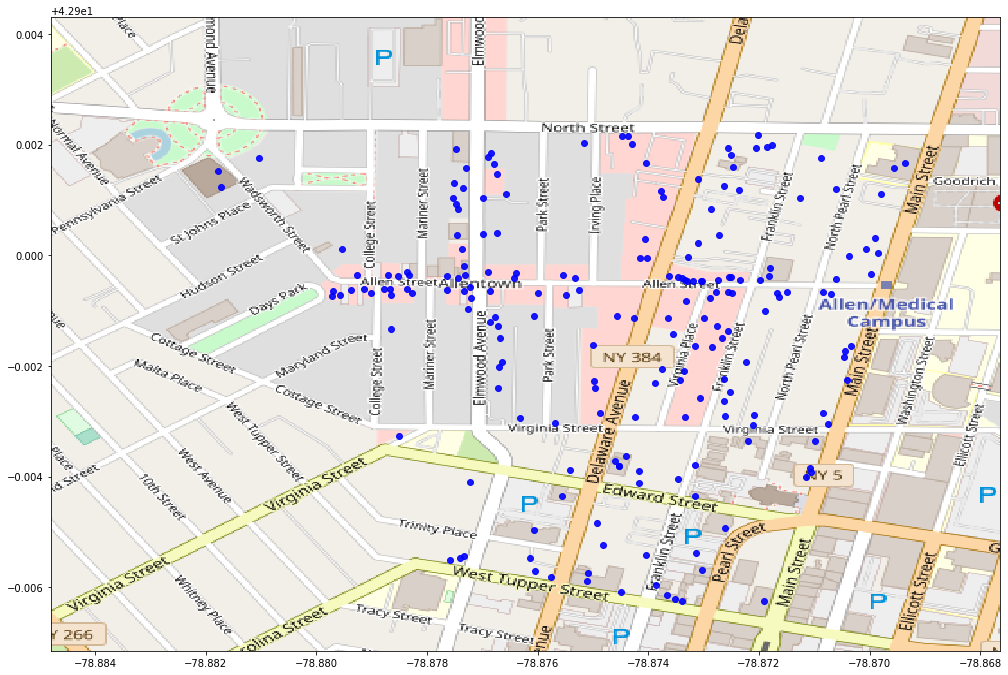

In [91]:
#--------------------------------------------ORIGIONAL: DO NOT MODIFY---------------------------------------------------
#fig, ax = plt.subplots(figsize = (17,18)) #(15,12)

#ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.9, c='b')
#ax.set_xlim(BBox[0],BBox[1])
#ax.set_ylim(BBox[2],BBox[3])

#ax.imshow(Allentown, zorder=0, extent = BBox, aspect= 'equal')

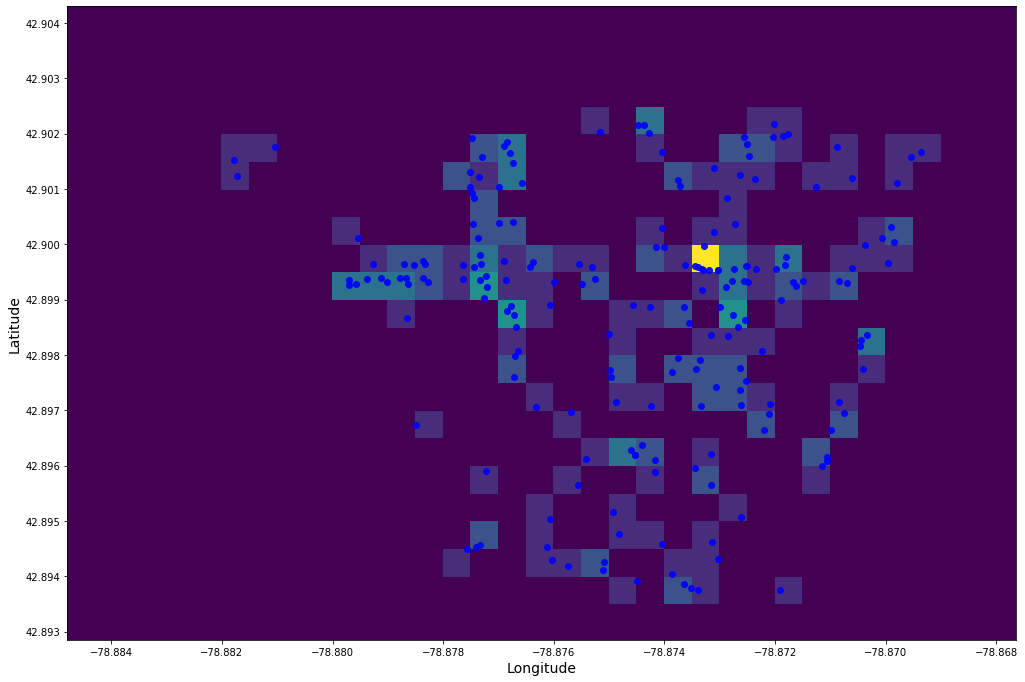

In [120]:
#---------------------------------------NOT THE BEST. FIND A BETTER OPTION---------------------------------------------
fig, ax = plt.subplots(figsize = (17,13)) #(15,12)

plt.hist2d(df.longitude, df.latitude, bins = [np.arange(-78.886, -78.866, 0.0005), np.arange(42.892, 42.905, 0.0005)], zorder=1)

ax.scatter(df.longitude, df.latitude, zorder=2, alpha= 0.9, c='b')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_yticks(np.arange(42.893, 42.904, 0.001))
ax.set_xlabel('Longitude', fontsize = 14)
ax.set_ylabel('Latitude', fontsize = 14)

ax.imshow(Allentown, zorder=0, extent = BBox, aspect= 'equal')

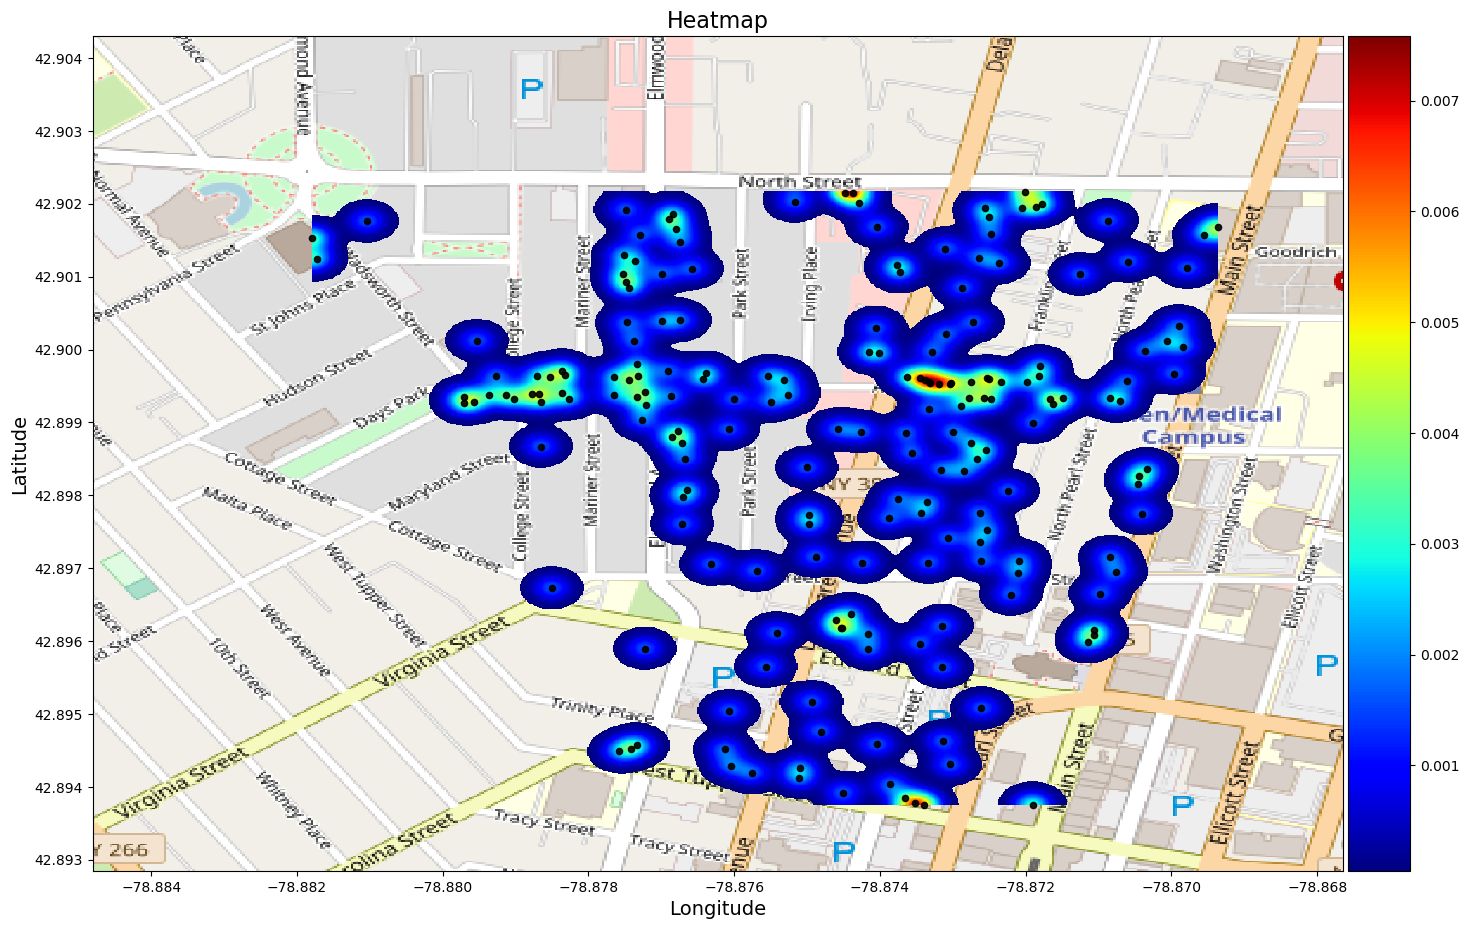

In [36]:
#plt.style.use('ggplot')
plt.style.use('default')

fig, ax = plt.subplots(figsize = (17,13)) #(15,12)

#plt.hist2d(df.longitude, df.latitude, 
#           bins = [np.arange(-78.886, -78.866, 0.0005), np.arange(42.892, 42.905, 0.0005)],
#           zorder=1,
#           cmap=plt.cm.jet)
            #interpolation='gaussian')

#plt.hexbin(df.longitude, df.latitude, bins = [np.arange(-78.886, -78.866, 0.0005), np.arange(42.892, 42.905, 0.0005)])    


heatmap, xedges, yedges = np.histogram2d(x=df.latitude.dropna(), y=df.longitude.dropna(), bins=750)
heatmap = gaussian_filter(heatmap, sigma=10)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
data_masked = np.ma.masked_where(heatmap < 0.00005, heatmap)

#plt.clf()
plt.title('Heatmap', fontsize=16)
plt.ylabel('y')
plt.xlabel('x')
im=plt.imshow(data_masked, extent=extent, origin='lower',cmap=cm.jet, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)


ax.scatter(df.longitude, df.latitude, zorder=2, alpha= 0.9, s=20, c='k')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_yticks(np.arange(42.893, 42.904, 0.001))
ax.set_xlabel('Longitude', fontsize = 14)
ax.set_ylabel('Latitude', fontsize = 14)


ax.imshow(Allentown, zorder=0, extent = BBox, aspect= 'equal')

plt.colorbar(im, cax=cax)
plt.show()

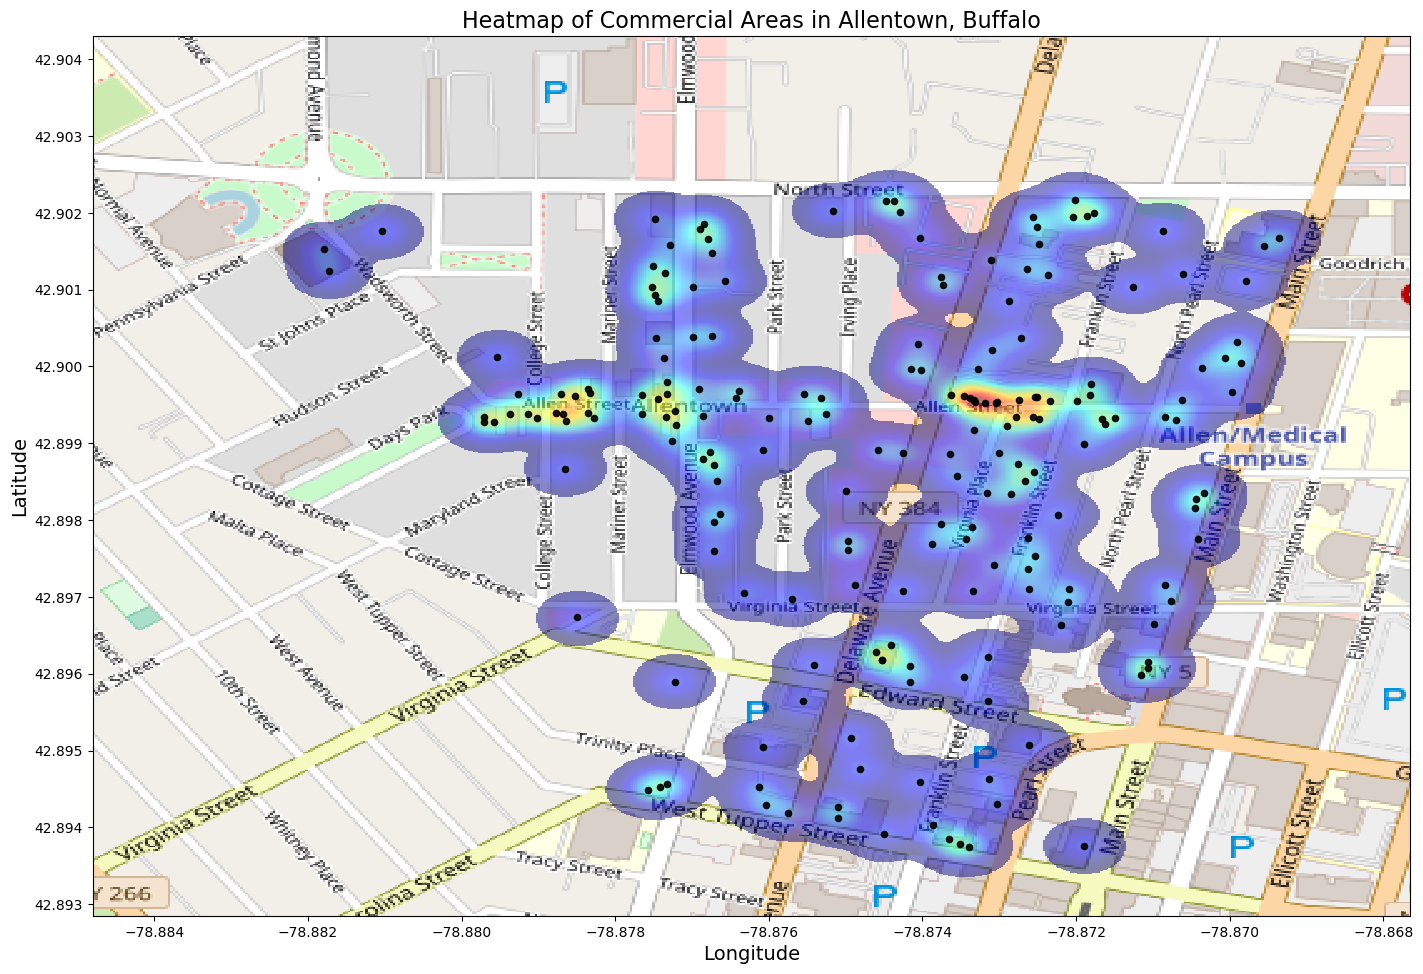

In [92]:
#plt.style.use('ggplot')
plt.style.use('default')

fig, ax = plt.subplots(figsize = (17,13)) #(15,12)

# Heatmap
xmin, xmax = BBox[0], BBox[1]
ymin, ymax = BBox[2], BBox[3]
nbins = 750

xbins = np.linspace(xmin, xmax, nbins)
ybins = np.linspace(ymin, ymax, nbins)

heatmap, xedges, yedges = np.histogram2d(x=df.latitude.dropna(), y=df.longitude.dropna(), bins=(ybins, xbins))
heatmap = gaussian_filter(heatmap, sigma=10)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
data_masked = np.ma.masked_where(heatmap < 0.0001, heatmap)

#plt.clf()
plt.title('Heatmap of Commercial Areas in Allentown, Buffalo', fontsize=16)
plt.ylabel('y')
plt.xlabel('x')
#im=plt.imshow(heatmap, extent=extent, origin='lower',cmap=cm.jet, zorder=1)
im=plt.imshow(data_masked, extent=extent, origin='lower',cmap=cm.jet, alpha=.475, zorder=1)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)

# Scatter Plot
ax.scatter(df.longitude, df.latitude, zorder=2, alpha= 0.9, s=20, c='k')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_yticks(np.arange(42.893, 42.904, 0.001))
ax.set_xlabel('Longitude', fontsize = 14)
ax.set_ylabel('Latitude', fontsize = 14)


ax.imshow(Allentown, zorder=0, extent = BBox, aspect= 'equal')

#plt.colorbar(im, cax=cax)
#plt.savefig('Heatmap of Commercial Areas in Allentown, Buffalo', dpi = 90, bbox_inches='tight')
plt.show()

In [93]:
df = pd.read_csv('C:/Users/cchin/Box/END 469/Project/Data/Grider Shops and Restaurants.csv')

In [94]:
df.head()

Latitude  Longitude Neighborhood                  Name Type
0  42.92704  -78.82625       Grider           united deli    C
1  42.92545  -78.82811       Grider  Grider Discount Mart    C
2  42.92457  -78.82780       Grider  Dunwoodie Aman Kathy  NaN
3  42.92395  -78.82800       Grider      Bissonette House  NaN
4  42.91890  -78.82820       Grider       The Family Spot  NaN

In [113]:
BBox = (-78.8430, -78.8152,
        42.9116, 42.9314)
BBox

(-78.843, -78.8152, 42.9116, 42.9314)

In [107]:
Grider = plt.imread('C:/Users/cchin/Box/END 469/Project/Data/Grider OSM map bounded.png')

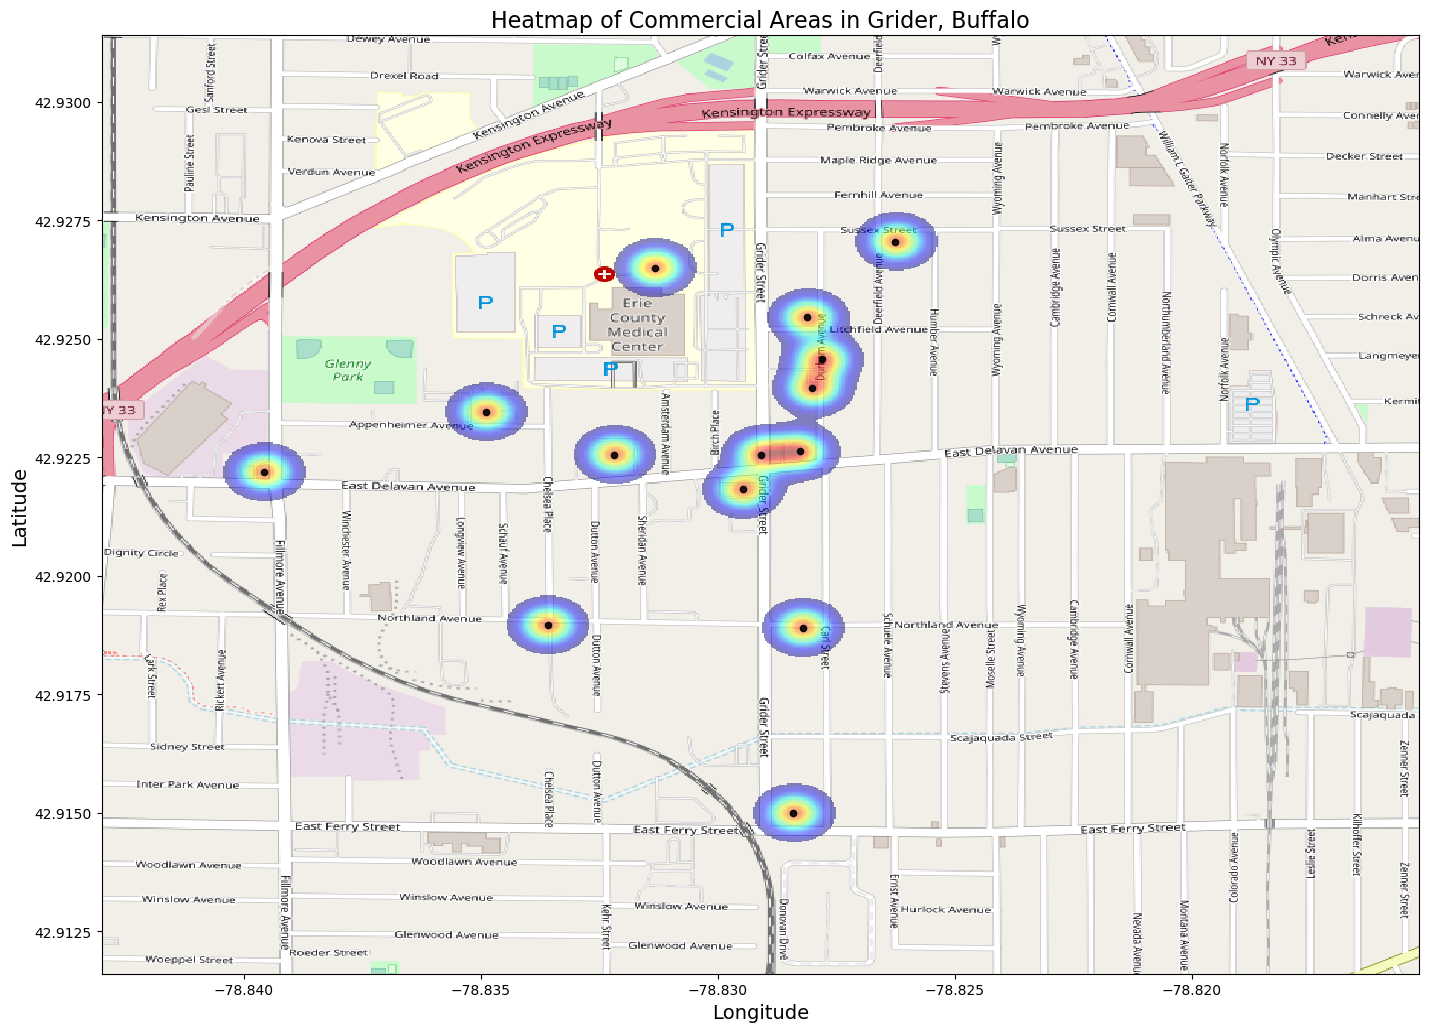

In [115]:
#plt.style.use('ggplot')
plt.style.use('default')

fig, ax = plt.subplots(figsize = (17,13)) #(15,12)

# Heatmap
xmin, xmax = BBox[0], BBox[1]
ymin, ymax = BBox[2], BBox[3]
nbins = 750

xbins = np.linspace(xmin, xmax, nbins)
ybins = np.linspace(ymin, ymax, nbins)

heatmap, xedges, yedges = np.histogram2d(x=df.Latitude.dropna(), y=df.Longitude.dropna(), bins=(ybins, xbins))
heatmap = gaussian_filter(heatmap, sigma=10)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
data_masked = np.ma.masked_where(heatmap < 0.0001, heatmap)

#plt.clf()
plt.title('Heatmap of Commercial Areas in Grider, Buffalo', fontsize=16)
plt.ylabel('y')
plt.xlabel('x')
#im=plt.imshow(heatmap, extent=extent, origin='lower',cmap=cm.jet, zorder=1)
im=plt.imshow(data_masked, extent=extent, origin='lower',cmap=cm.jet, alpha=.475, zorder=1)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)

# Scatter Plot
ax.scatter(df.Longitude, df.Latitude, zorder=2, alpha= 0.9, s=20, c='k')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#ax.set_yticks(np.arange(42.893, 42.904, 0.001))
ax.set_xlabel('Longitude', fontsize = 14)
ax.set_ylabel('Latitude', fontsize = 14)


ax.imshow(Grider, zorder=0, extent = BBox, aspect= 'equal')

#plt.colorbar(im, cax=cax)
plt.savefig('Heatmap of Commercial Areas in Grider, Buffalo', dpi = 90, bbox_inches='tight')
plt.show()

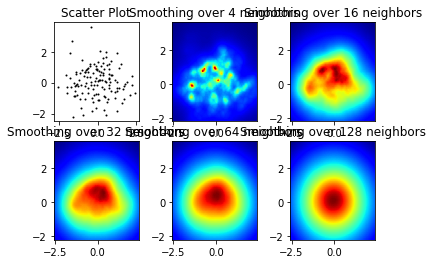

In [79]:
def data_coord2view_coord(p, vlen, pmin, pmax):
    dp = pmax - pmin
    dv = (p - pmin) / dp * vlen
    return dv

def nearest_neighbors(xs, ys, reso, n_neighbors):
    im = np.zeros([reso, reso])
    extent = [np.min(xs), np.max(xs), np. min(ys), np.max(ys)]
    
    xv = data_coord2view_coord(xs, reso, extent[0], extent[1])
    yv = data_coord2view_coord(ys, reso, extent[2], extent[3])
    for x in range(reso):
        for y in range(reso):
            xp = (xv - x)
            yp = (yv - y)
            
            d = np.sqrt(xp**2 + yp**2)
            
            im[y][x] = 1 / np.sum(d[np.argpartition(d.ravel(), n_neighbors)[:n_neighbors]])
            
    return im, extent

n = 129
xs = np.random.randn(n)
ys = np.random.randn(n)
resolution = 250

fig, axes = plt.subplots(2,3)
#fig = plt.figure(figsize=(10,10))

for ax, neighbors in zip(axes.flatten(), [0, 4, 16, 32, 64, 128]):
    if neighbors == 0:
        ax.plot(xs, ys, 'k.', markersize = 2)
        ax.set_aspect('equal')
        ax.set_title("Scatter Plot")
    else:
        im, extent = nearest_neighbors(xs, ys, resolution, neighbors)
        ax.imshow(im, origin='lower', extent=extent, cmap=cm.jet)
        ax.set_aspect('equal')
        ax.set_title("Smoothing over %d neighbors" % neighbors)
        ax.set_xlim(extent[0], extent[1])
        ax.set_ylim(extent[2], extent[3])
#plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

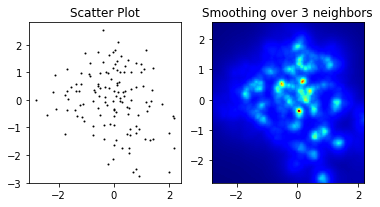

In [83]:
fig = plt.figure(figsize=(10,10))
fig, axes = plt.subplots(1, 2)

n = 129
xs = np.random.randn(n)
ys = np.random.randn(n)
resolution = 250

for ax, neighbors in zip(axes.flatten(), [0,3]):
    if neighbors == 0:
        ax.plot(xs, ys, 'k.', markersize = 2)
        ax.set_aspect('equal')
        ax.set_title("Scatter Plot")
    else:
        im, extent = nearest_neighbors(xs, ys, resolution, neighbors)
        ax.imshow(im, origin='lower', extent=extent, cmap=cm.jet)
        ax.set_aspect('equal')
        ax.set_title("Smoothing over %d neighbors" % neighbors)
        #ax.set_xlim(extent[0], extent[1])
        #ax.set_ylim(extent[2], extent[3])
plt.show()

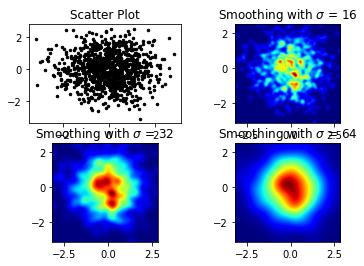

In [96]:
def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2,2)

x = np.random.randn(1000)
y = np.random.randn(1000)

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter Plot")
    else:
        img, extent = myplot(x, y, s)
        ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with $\sigma$ = %d" % s)

plt.show()

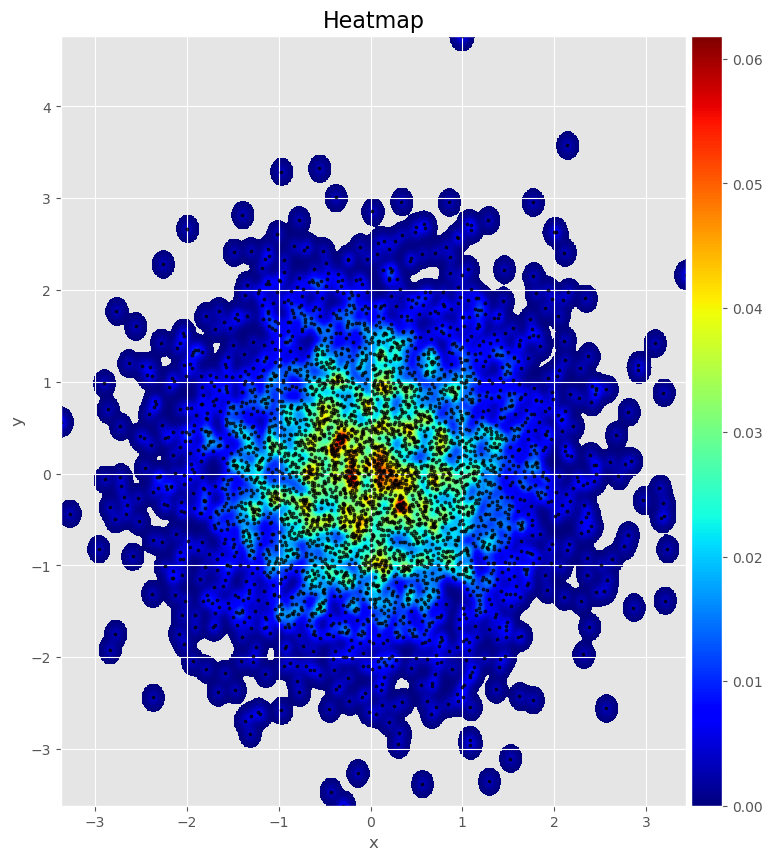

In [60]:
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(10,10))

x = np.random.randn(4096)
y = np.random.randn(4096)

ax.scatter(x, y, alpha= 0.7, c='k', s=5, zorder=1)

heatmap, xedges, yedges = np.histogram2d(y, x, bins=1000)
#heatmap[heatmap == 0] = np.nan
heatmap = gaussian_filter(heatmap, sigma=7)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
data_masked = np.ma.masked_where(heatmap < 0.0001, heatmap)

#plt.clf()
plt.title('Heatmap', fontsize=16)
plt.ylabel('y')
plt.xlabel('x')
im = plt.imshow(data_masked, extent=extent, origin='lower',cmap=cm.jet, vmin=0, zorder=0)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
#plt.show()

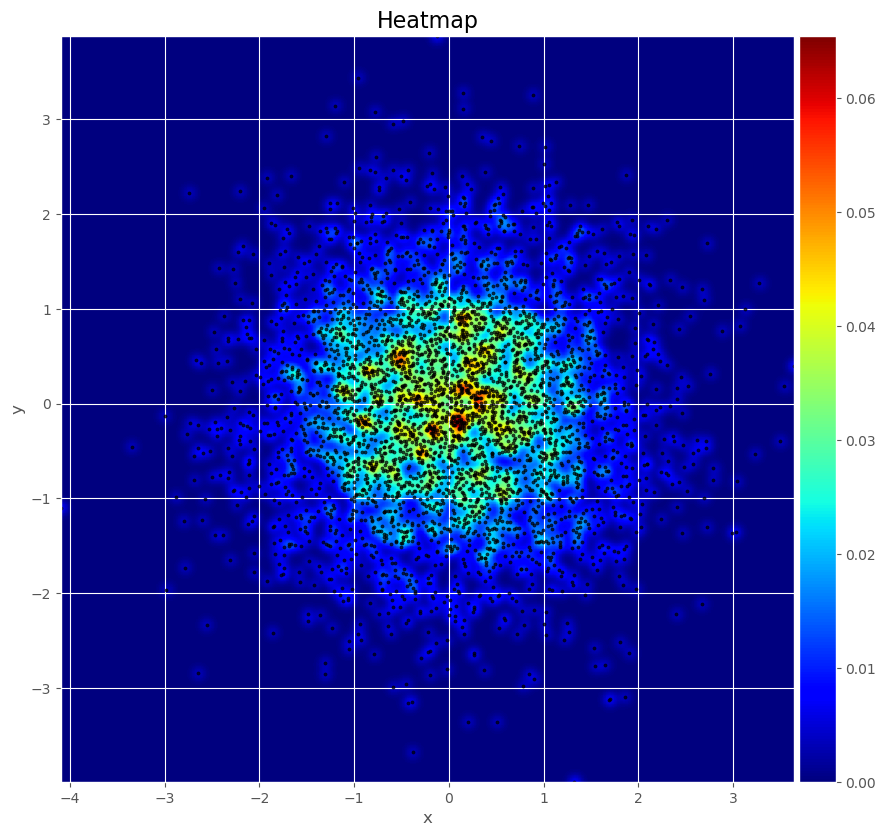

In [28]:
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(10,10))

x = np.random.randn(4096)
y = np.random.randn(4096)

ax.scatter(x, y, alpha= 0.7, c='k', s=5, zorder=1)

heatmap, xedges, yedges = np.histogram2d(y, x, bins=1000)
#heatmap[heatmap == 0] = np.nan
heatmap = gaussian_filter(heatmap, sigma=7)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
#data_masked = np.ma.masked_where(heatmap < 0.0001, heatmap)

#plt.clf()
plt.title('Heatmap', fontsize=16)
plt.ylabel('y')
plt.xlabel('x')
im = plt.imshow(heatmap, extent=extent, origin='lower',cmap=cm.jet, vmin=0, zorder=0)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
#plt.show()

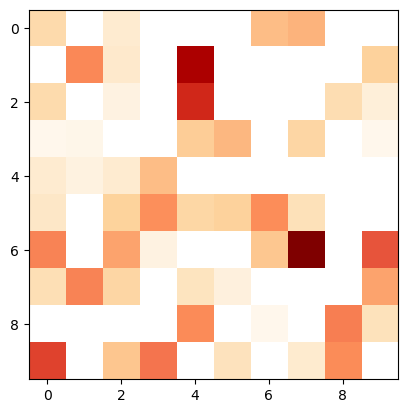

In [11]:
a = np.random.randn(10,10)
a = np.ma.masked_where(a<0.05,a)

cmap = plt.cm.OrRd
cmap.set_bad(color='none')

plt.imshow(a, interpolation='none', cmap=cmap)

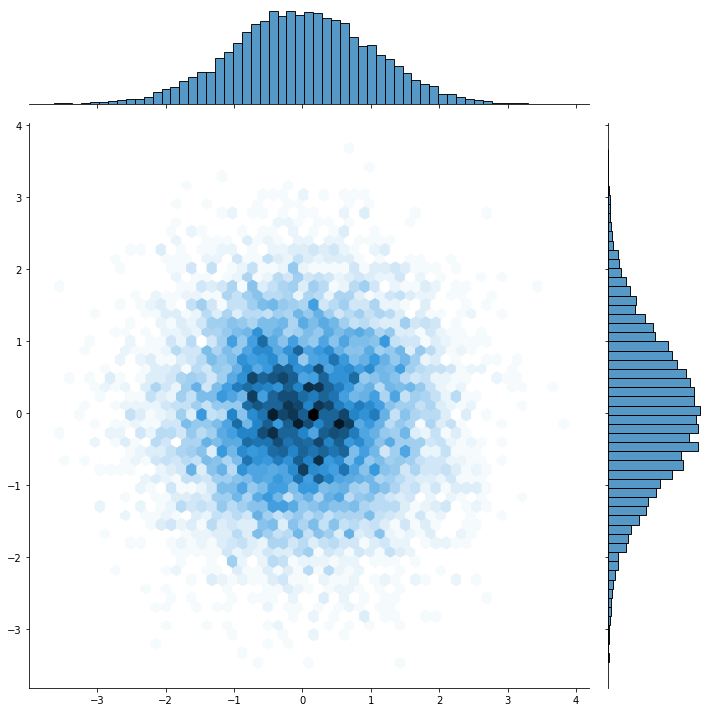

In [179]:
x = np.random.randn(8873)
y = np.random.randn(8873)

sns.jointplot(x=x, y=y, kind='hex', height=10)
plt.show()

In [103]:
buffalo_bg = gpd.read_file('C:/Users/cchin/Box/END 469/Project/Data/Buffalo/buffalo_bg.shp')

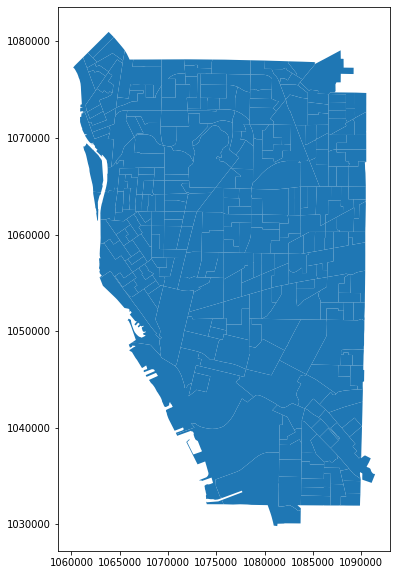

In [53]:
fig, ax = plt.subplots(figsize = (15,10))
buffalo_bg.plot(ax = ax)

In [56]:
buffalo_street = gpd.read_file('C:/Users/cchin/Box/END 469/Project/Data/Buffalo/buffalo_street.shp')
crs = {'init': 'epsg:4326'}
buffalo_street.head()

DateModifi  NYSStreetI LeftFromAd LeftToAddr RightFromA RightToAdd  \
0  2009-07-27   477802915       None       None       None       None   
1        None   477802851        294        294        281        295   
2        None   477802846          2         98          1         99   
3        None   477802849        260        292        261        279   
4  2009-07-27   477802845          1          1       None       None   

          CompleteSt PreModifie PreDirecti PreType  ... SP_DATETIM USERNAME  \
0     Unnamed Street       None       None    None  ...       None     None   
1    Dorrance Avenue       None       None    None  ...       None     None   
2  High View Terrace       None       None    None  ...       None     None   
3    Dorrance Avenue       None       None    None  ...       None     None   
4    Mckinley Circle       None       None    None  ...       None     None   

  LeftCountr RightCou_1 LeftParity RightParit LeftESN RightESN  Shape_Leng  \
0       None       None       None       None    None     None   25.239503   
1       None       None       None       None    None     None   25.035515   
2       None       None       None       None    None     None  295.969468   
3       None       None       None       None    None     None   69.066039   
4       None       None       None       None    None     None   12.360405   

                                            geometry  
0  LINESTRING (1086726.842 1031933.263, 1086726.8...  
1  LINESTRING (1086726.852 1031935.089, 1086808.9...  
2  LINESTRING (1086500.453 1031936.080, 1086514.3...  
3  LINESTRING (1086500.453 1031936.080, 1086726.8...  
4  LINESTRING (1086321.390 1031977.375, 1086323.4...  

[5 rows x 69 columns]

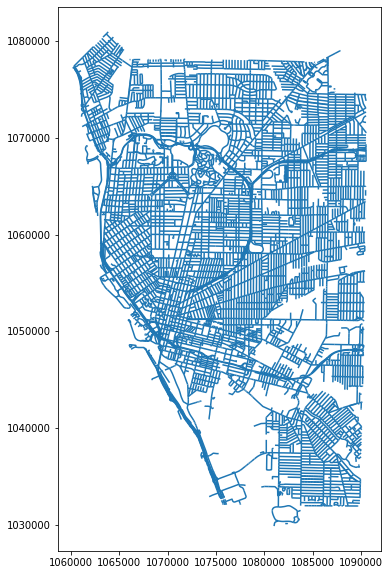

In [34]:
fig, ax = plt.subplots(figsize = (15,10))
buffalo_street.plot(ax = ax)

In [35]:
df = pd.read_csv('C:/Users/cchin/Box/END 469/Project/Data/Allentown Shops and Restaurants.csv')
crs = {'init': 'epsg:4326'}
df.head()

latitude  longitude Neighborhood  \
0  42.901528 -78.881786    Allentown   
1  42.901241 -78.881727    Allentown   
2  42.901761 -78.881039    Allentown   
3  42.900122 -78.879532    Allentown   
4  42.899348 -78.879709    Allentown   

                                       Establishment  
0                          First Presbyterian Church  
1                  The Serendipity Shoppe of Buffalo  
2  Gateway Longview - Behavioral Health Services,...  
3                                    PAUSA art house  
4                                 Pawprints By Penny

In [38]:
geometry = [Point(xy) for xy in zip( df["longitude"], df["latitude"])]
geometry[:4]

In [39]:
geo_df = gpd.GeoDataFrame(df, #specify the data
                          crs = crs, #specify our coordinate reference system
                          geometry = geometry) # specify the geometry list we created
geo_df.head()

latitude  longitude Neighborhood  \
0  42.901528 -78.881786    Allentown   
1  42.901241 -78.881727    Allentown   
2  42.901761 -78.881039    Allentown   
3  42.900122 -78.879532    Allentown   
4  42.899348 -78.879709    Allentown   

                                       Establishment  \
0                          First Presbyterian Church   
1                  The Serendipity Shoppe of Buffalo   
2  Gateway Longview - Behavioral Health Services,...   
3                                    PAUSA art house   
4                                 Pawprints By Penny   

                     geometry  
0  POINT (-78.88179 42.90153)  
1  POINT (-78.88173 42.90124)  
2  POINT (-78.88104 42.90176)  
3  POINT (-78.87953 42.90012)  
4  POINT (-78.87971 42.89935)

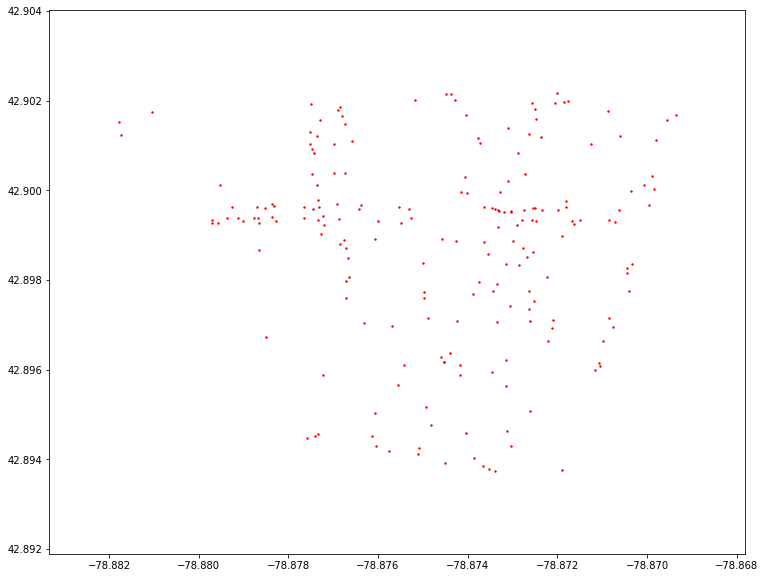

In [57]:
fig, ax = plt.subplots(figsize = (15,10))
#buffalo_bg.plot( alpha = 0.4, color = "blue")
geo_df.plot(ax = ax, markersize = 2, color = 'red')

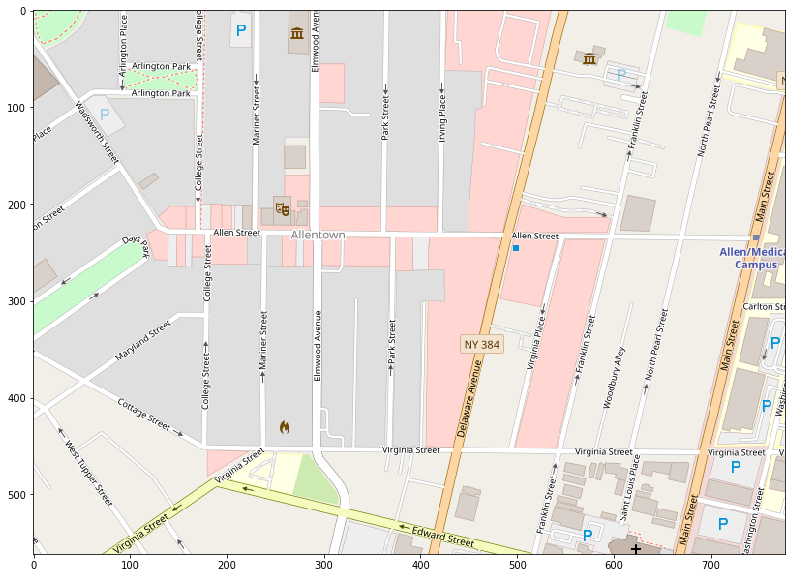

In [61]:
fig, ax = plt.subplots(figsize = (15,10))
geo_df.plot(ax = ax, zorder=1, markersize = 2, color = 'red')

ax.imshow(Allentown, zorder=0)